In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [9]:
data=pd.read_csv("healthcare_data.csv")
data

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease
0,1,69,Male,95.0,122.0,No,No
1,2,32,Male,129.0,191.0,No,No
2,3,89,Female,101.0,214.0,No,No
3,4,78,Female,142.0,203.0,No,No
4,5,38,Male,160.0,217.0,No,No
...,...,...,...,...,...,...,...
500,47,25,Male,106.0,148.0,No,No
501,145,26,Male,128.0,116.0,No,No
502,213,86,Male,98.0,159.0,No,No
503,303,43,Male,171.0,243.0,No,No


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB


In [13]:
data.isnull().sum()

Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

In [19]:
for column in ['Blood_Pressure', 'Cholesterol']:
    data[column].fillna(data[column].mean(), inplace=True)  # Mean Imputation

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)  # Mode Imputation

C:\Users\user\AppData\Local\Temp\ipykernel_12620\1630418736.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)  # Mean Imputation
C:\Users\user\AppData\Local\Temp\ipykernel_12620\1630418736.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [23]:
data.isnull().sum()

Patient_ID        0
Age               0
Gender            0
Blood_Pressure    0
Cholesterol       0
Diabetes          0
Heart_Disease     0
dtype: int64

In [27]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool

In [29]:
df = data.drop_duplicates()

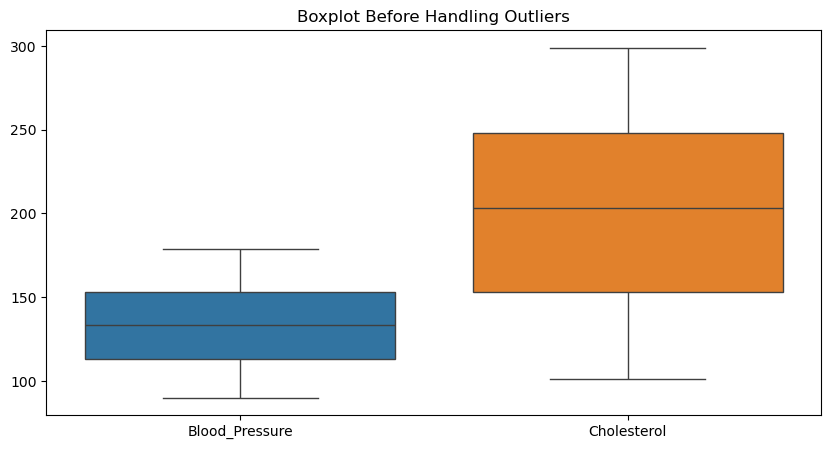

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Blood_Pressure', 'Cholesterol']])
plt.title("Boxplot Before Handling Outliers")
plt.show()